In [1]:
from Vissim_env_class import environment
from Actor_critic_class import ACAgent
from MasterAC_Agent import MasterAC_Agent
from MasterDQN_Agent import MasterDQN_Agent

# Network Specific Libraries
from Balance_Functions import balance_dictionary

# General Libraries
import numpy as np 
import pylab as plt
import os
import csv
import pandas as pd
import json

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Balance

In [ ]:
model_name  = 'Balance'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory = "E:\Backup - Onedrive\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim"
sim_length = 1800

# all controller actions
Balance_dictionary =\
{\
    # Controller Number 2 
    0 : {'compatible_actions' : {   0 : [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
                                    1 : [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
                                    2 : [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0] },
         
         'link' : [2, 40, 7, 38],
         'lane' : ['2-1', '2-2', '2-3', '40-1', '7-1', '7-2', '7-3', '38-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
         
         
        },
    # Controller Number 3
    1 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 1, 0, 1, 1],
                                    1 : [1, 0, 0, 1, 0, 0, 0, 0],
                                    2 : [0, 0, 1, 0, 0, 1, 0, 0] },
         
         'link' : [5, 48, 70, 46],
         'lane' : ['5-1', '5-2', '5-3', '48-1', '70-1', '70-2', '70-3', '46-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 4
    2 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    1 : [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    2 : [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                                    3 : [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
         
         'link' : [73, 100, 84, 95],
         'lane' : ['73-1', '73-2', '73-3', '100-1', '100-2', '100-3', '100-4',\
                  '84-1', '84-2', '84-3', '95-1', '95-2', '95-3', '95-4'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [14],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 5
    3 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
                                    1 : [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
                                    2 : [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1]},
         
         'link' : [87, 36, 10, 34],
         'lane' : ['87-1', '87-2', '87-3', '36-1', '10-1', '10-2', '10-3', '34-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 6 
    4 : {'compatible_actions' : {   0 : [0, 1, 1, 0, 0],
                                    1 : [1, 1, 0, 0, 0],
                                    2 : [0, 0, 0, 1, 0]},
         'link' : [8, 24, 13],
         'lane' : ['8-1', '8-2', '24-1', '13-1', '13-2', '13-3'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 8
    5 : {'compatible_actions' : {   0 : [1, 0, 1, 0, 1, 0],
                                    1 : [0, 1, 0, 1, 0, 1]},
         'link' : [26, 23, 35],
         'lane' : ['26-1', '23-1', '35-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [3],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
         
        },
    # Controller Number 9
    6 : {'compatible_actions' : {   0 : [0, 1, 0, 1, 1, 1],
                                    1 : [1, 0, 1, 0, 0, 0]},
         'link' : [51, 92, 64, 19],
         'lane' : ['51-1', '92-1', '92-2', '64-1', '19-1', '19-2'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Contoller Number 10
    7 : {'compatible_actions' : {   0 : [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
                                    1 : [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                                    2 : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
         'link' : [18, 66, 16],
         'lane' : ['18-1', '18-2', '18-3', '66-1', '16-1', '16-2', '16-3'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [7],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 12
    8 : {'compatible_actions' : {   0 : [1, 0, 1, 0, 0, 0, 0],
                                    1 : [0, 1, 0, 0, 0, 0, 0]},
         'link' : [62, 45, 44],
         'lane' : ['62-1', '45-1', '44-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [3],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 13
    9 : {'compatible_actions' : {   0 : [0, 1, 0, 1, 1, 0, 1, 0],
                                    1 : [1, 0, 1, 0, 0, 1, 0, 1]},
         'link' : [60, 43, 55, 58],
         'lane' : ['60-1', '43-1', '55-1', '58-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
            
        },
    # Controller 15
    10 : {'compatible_actions' : {  0 : [1, 0, 1, 0, 0, 1, 0, 1],
                                    1 : [0, 1, 0, 1, 1, 0, 1, 0]},
         'link' : [32, 42, 30, 39],
         'lane' : ['32-1', '42-1', '30-1', '39-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller 16
    11 : {'compatible_actions' :  { 0 : [1, 0, 1, 0, 0, 1, 0, 1],
                                    1 : [0, 1, 0, 1, 1, 0, 1, 0]},
         'link' : [29, 50, 28, 47],
         'lane' : ['29-1', '50-1', '28-1', '47-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller 17
    12 : {'compatible_actions' :  { 0 : [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
                                    1 : [0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1],
                                    2 : [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0],
                                    3 : [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]},
         'link' : [27, 22, 25, 77],
         'lane' : ['27-1', '22-1', '22-2', '22-3', '25-1', '77-1', '77-2'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [7],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
            
        },
    # Controller 33 
    13 : {'compatible_actions' :  { 0 : [1, 0, 0, 1, 0, 0, 1, 0, 0],
                                    1 : [0, 0, 1, 1, 0, 1, 0, 0, 0],
                                    2 : [0, 1, 0, 0, 1, 1, 0, 1, 1]},
         'link' : [68, 71, 75],
         'lane' : ['68-1', '68-2', '68-3', '71-1', '71-2', '75-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        }
}

In [ ]:
env = environment(model_name, vissim_working_directory, sim_length, Balance_dictionary,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

In [ ]:
env.SCUs

In [ ]:
env.SCUs[0].state

In [ ]:
#env.reset()

In [ ]:
actions = dict()
for i in range(len(env.SCUs)):
    actions[i]=0
    
print(actions)

In [ ]:
class Cyclic_Control():
    def __init__(self,size):
        self.action = 0
        self.size = size
        
    def choose_action(self,state=None):
        self.action = (self.action + 1) % self.size
        return self.action
CC = [] 

for idx, info in Balance_dictionary.items():
        cycle_size = len(info['compatible_actions'])
        CC.append(Cyclic_Control(cycle_size))

In [ ]:
start_state = env.get_state()
for idx, s in start_state.items():
    actions[idx] = CC[idx].choose_action(s)
    
for _ in range(10000):
    action_required, SARSDs = env.step(actions)
    if action_required : 
        actions = dict()
        for idx , sarsd in SARSDs.items():
            s,a,r,ns,d = sarsd
            #print(sarsd)
            
            # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
            actions[idx] = CC[idx].choose_action(ns)
        
    if env.done :
        env.reset()
        for idx, s in start_state.items():
            actions[idx] = CC[idx].choose_action(ns)
        
        

# Balance RL AC

In [ ]:
model_name  = 'Balance'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 1800
agent_type = 'AC'

# all controller actions
Balance_dictionary = balance_dictionary(agent_type)


In [ ]:
env = environment(model_name, vissim_working_directory, sim_length, Balance_dictionary,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

In [ ]:

# Agent hyperparameters
gamma = 0.85
alpha = 0.0005
value = 25
entropy = 5000
n_step_size = 11
reduce_entropy_every = 1000
entropy_threshold = 0.5
timesteps_per_second = 1


# for the monitoring only for AC
horizon = 50
n_sample = 10

Balance_MultiAc_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary, n_step_size, gamma, alpha, entropy, value, \
                timesteps_per_second = timesteps_per_second, verbose = True, horizon = 100, \
                n_sample = 10)


In [ ]:
Balance_MultiAc_Agents.train(1000)

Balance_MultiAc_Agents.save()

In [ ]:
Balance_MultiAc_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary, n_step_size, gamma, alpha, entropy, value, \
                timesteps_per_second = timesteps_per_second, verbose = True, horizon = 100, \
                n_sample = 10)

Balance_MultiAc_Agents.load(best = False)

In [ ]:
Agents = []
for idx, info in Balance_dictionary['junctions'].items():
        acts = info['compatible_actions']
        Agent = ACAgent(info['state_size'], len(acts), idx, n_step_size, gamma, alpha, entropy, value)
        Agents.append(Agent)

In [ ]:
start_state = env.get_state()
actions = {}
for idx, s in start_state.items():
            actions[idx] = int(Agents[idx].choose_action(s))

for i in range(30000):
    action_required, SARSDs = env.step_to_next_action(actions)
    if action_required : 
        actions = dict()
        for idx , sarsd in SARSDs.items():
            s,a,r,ns,d = sarsd
            
            #print(sarsd)
            Agents[idx].remember(s,a,r,ns,d)
            if len(Agents[idx].memory) >= Agents[idx].n_step_size :
                Agents[idx].learn() 
            
            # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
            actions[idx] = int(Agents[idx].choose_action(ns))
            #print(actions)
            
            if (i+1)%reduce_entropy_every == 0:
                if Agents[idx].params['entropy'] >= entropy_threshold :
                    Agents[idx].reduce_entropy()
                    print ("Agent {} : Entropy reduced to {} " .format(idx, Agents[idx].params['entropy']))
        
    # For the saving , monitoring of the agent 
    if env.done :
        env.reset()
        
        
        # Only for AC
        for idx, agent in enumerate(Agents):
            predicted_values, true_values, proba0, probas = agent.value_check(horizon, n_sample)
            print ("Agent {} : Predicted Values and True Return : \n {} \n {}" .format(idx, predicted_values, true_values))
            print ("Agent {} : Proba distribution on those states : \n {}" .format(idx, probas))
            print ("Agent {} : Proba distribution on the 0 state : \n {}" .format(idx, proba0))
            agent.reset()
                    
        
        for idx, s in start_state.items():
            actions[idx] = Agents[idx].choose_action(s)

In [ ]:
env.reset()

# Balance DQN Debug

In [ ]:
###############################
## Initialization Parameters ##
###############################

intersection = "1_2_4"
map_name  = 'Balance_int'+str(intersection)
model_name = map_name
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'
#vissim_working_directory = "E:\\OneDrive - University of Warwick\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim"

## Simulation Parameters
Random_Seed = 44
sim_length = 9001
timesteps_per_second = 1
agent_type = "DDQN"
#actions_set = 'default_actions'     # 'default_actions' or 'all_actions'
actions_set = 'all_actions'

## DQN Hyperaramenters
episodes = 500
copy_weights_frequency = 10

PER_activated = True
memory_size = 5000
batch_size = 128
batches_per_episode = 10

alpha = 0.00005
gamma = 0.95

# Load and partition balance dictionary
Balance_dictionary = balance_dictionary(agent_type)
if intersection == "1_2_4":
    intersection = 1
elif intersection == "11_12":
    intersection = 11
partial_dictionary = {"junctions": { (intersection-1) : Balance_dictionary["junctions"][intersection-1]},\
                      "demand": Balance_dictionary["demand"]}

Session_ID = map_name + "_" + actions_set + "_" + str(episodes) + "_" + str(sim_length-1) + "_" + agent_type
print("Current simulation: {}".format(Session_ID))

# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.01

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
## Deploy Agents
Balance_int_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, partial_dictionary, actions_set,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, batches_per_episode, copy_weights_frequency, epsilon_sequence,\
                Random_Seed, timesteps_per_second, Session_ID, verbose = True)
Balance_int_MultiDQN_Agents.prepopulate_memory()

In [ ]:
# Deploy Environment
env = None
env = environment(model_name, vissim_working_directory, sim_length, partial_dictionary, actions_set,\
                  Random_Seed = Random_Seed, timesteps_per_second = timesteps_per_second, mode = 'debug', delete_results = True, verbose=True)

In [ ]:
## Test to ensure correct deployment of agents

# Test 1: Check number of agents
print(env.SCUs.items())

# Test 2: Check Dictionary for each agent
agent = 0
print("state_type: " + env.SCUs[agent].state_type)
print("state_size: ")
print(env.SCUs[agent].state_size)
print("reward_type: ")
print(env.SCUs[agent].reward_type)
print("compatible_actions: ")
print(env.SCUs[agent].compatible_actions)
print("all_actions: ")
print(env.SCUs[agent].all_actions)
print("Lanes_names: " )
print(env.SCUs[agent].Lanes_names)
print("Links_names: ")
print(env.SCUs[agent].Links_names)
print("time_steps_per_second: " + str(env.SCUs[agent].time_steps_per_second))
print("queues_counter_ID: " )
print(env.SCUs[agent].queues_counter_ID)
print("queues_counters: ")
print(env.SCUs[agent].queues_counters)
print("signal_controller: ")
print(env.SCUs[agent].signal_controller)
print("Signal_Groups: " )
print(env.SCUs[agent].signal_groups)
print("Node: " + str(env.SCUs[agent].Node))

## CORRECT - No apparent issues from this test

In [ ]:
## Tests to ensure correct STATE READING
timesteps = 1
for i in range(timesteps):
    env.Vissim.Simulation.RunSingleStep()

## Test 3: Correct Reading of queues from QUEUE COUNTERS
print("queues_counter_ID: " )
print(env.SCUs[0].queues_counter_ID)
print([env.Vissim.Net.QueueCounters.ItemByKey(i).AttValue('QLen(Current, Last)') for i in env.SCUs[0].queues_counter_ID])
    
# Test 4: Correct Reading of Aggregated Queues by SCU
print(env.SCUs[0].calculate_queues())

## Test 5: Correct Reading of Global Queues by ENVIRONMENT
print(env.get_queues())

## CORRECT - No apparent issues from this test

In [ ]:
## Test 6: Correct Reading of Initial State, and Generation of according actions
start_state = env.get_state()
actions = {}
print("Dict([(Agent_ID, array(state))])")
print(start_state.items())
print("")
for idx, s in start_state.items():
    actions[idx] = Balance_int_MultiDQN_Agents.Agents[idx].choose_action(s)
print("{Agent_ID : Chosen_Action}")
print(actions)

## CORRECT - No apparent issues from this test

In [ ]:
## Test 7: Correct Reading of General State from SCU and Generation of according actions
SARSDs = env.step_to_next_action(actions)
actions = dict()
for idx , sarsd in SARSDs.items():
    s,a,r,ns,d = sarsd
    
print("Agent_ID: " + str(SARSDs.keys()))
print("Agent_State:")
print(SARSDs[0][0][0])
print("Agent_Action: " + str(SARSDs[0][1]))
print("Agent_Reward: " + str(SARSDs[0][2]))
print("Agent_Next_State:")
print(SARSDs[0][3][0])
print("Done: " + str(SARSDs[0][4]))

## CORRECT - No apparent issues from this test

In [ ]:
## Test 8: Correct operation of signal groups
signal_group = 5
env.SCUs[0].signal_groups[signal_group].SetAttValue("SigState", "GREEN")
env.Vissim.Simulation.RunSingleStep()

## CORRECT - No apparent issues from this test

In [ ]:
###### Test 9-1: Correct implementation of actions (SETUP)
for idx, agent in Balance_int_MultiDQN_Agents.Agents.items():
    agent.reset()

start_state = env.get_state()
print("Initial State: {Agent_ID: initual queues}")
print(start_state)
actions = {}
for idx, s in start_state.items():
    actions[idx] = Balance_int_MultiDQN_Agents.Agents[idx].choose_action(s)
print("Initial Choice of Actions: {Agent_ID: action}")    
print(actions)

# That is not a clean way to do this
def to_dictionary(dictionary,idx,value):
    """
    Assign a value to an index in a dictionary
    """
    dictionary[idx] = value
    
## CORRECT - No apparent issues from this test

In [ ]:
###### Test 9-2: Correct implementation of actions (EXECUTION)
##
## ATTENTION: If an "index out of range" is requested, the system will break an will\
##            require a reset. This does not affect normal simulation.

actions[0] = 4
# This is step_to_next_action() function
while not env.action_required:
    
    # This is the step() function
    Sarsd = dict()
    
    # The default position is that no action is required, only a step of simulator
    env.action_required = False
    #print("false 1")
    
    [scu.action_update(actions[0] , green_time = 5 ) for idx, scu in env.SCUs.items() if scu.action_required]
    
    [scu.update() for idx,scu in env.SCUs.items()]
    
    env.Vissim.Simulation.RunSingleStep()
    
    [to_dictionary(Sarsd,idx,scu.sars()+[env.done]) for idx,scu in env.SCUs.items() if scu.action_required ]
    
    if len(Sarsd) > 0 or env.done :
        env.action_required = True
        #print("TRUE")
    
    print(Sarsd)
        
env.action_required = False
#print("false 2")


In [ ]:
## Test 10: Correct changing of phases based on actions

In [ ]:
## Test 11: Correct calculation of rewards

# Balance RL DQN Partial Training

In [2]:
intersection = "1_2_4"
map_name  = 'Balance_int'+str(intersection)
model_name = map_name
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'
#vissim_working_directory = "E:\\OneDrive - University of Warwick\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim"

## Simulation Parameters
Random_Seed = 42
sim_length = 9001
timesteps_per_second = 1
agent_type = "DDQN"
actions = 'default_actions'     # 'default_actions' or 'all_actions'

## DQN Hyperaramenters
episodes = 500
copy_weights_frequency = 10

PER_activated = True
memory_size = 5000
batch_size = 128
batches_per_episode = 10

alpha = 0.0001
gamma = 0.95

# Load and partition balance dictionary
Balance_dictionary = balance_dictionary(agent_type)
if intersection == "1_2_4":
    intersection = 1
elif intersection == "11_12":
    intersection = 11
partial_dictionary = {"junctions": { (intersection-1) : Balance_dictionary["junctions"][intersection-1]},\
                      "demand": Balance_dictionary["demand"]}

Session_ID = map_name + "_" + actions + "_" + str(episodes) + "_" + str(sim_length-1) + "_" + agent_type
print("Current simulation: {}".format(Session_ID))

Current simulation: Balance_int1_2_4_default_actions_500_9000_DDQN


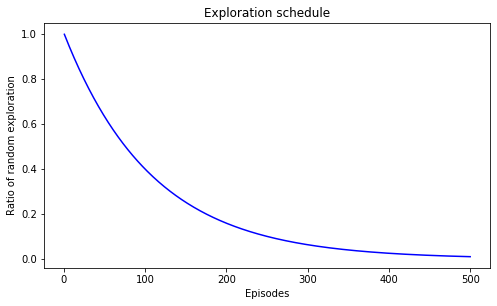

In [3]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.01

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)


In [4]:
Balance_int_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, partial_dictionary, actions,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, batches_per_episode, copy_weights_frequency, epsilon_sequence,\
                Random_Seed, timesteps_per_second, Session_ID, verbose = True)

INTERSECTION 0: SETTING UP AGENT
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 48)                432       
_________________________________________________________________
dense_1 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_2 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 147       
Total params: 5,283
Trainable params: 5,283
Non-trainable params: 0
_________________________________________________________________
Deployed instance of Double Deep Q Learning Agent(s) at Intersection 0



In [5]:
Balance_int_MultiDQN_Agents.prepopulate_memory()

Previous Experience: Found. Loading into agents
Previous Experience: Successfully loaded file from:
C:\Users\acabrejasegea\OneDrive - The Alan Turing Institute\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\Balance_int1_2_4\Agents_Results\DDQN\Balance_int1_2_4_default_actions_500_9000_DDQN\Agent0_PERPre_5000.p


In [6]:
Balance_int_MultiDQN_Agents.train(episodes)

Working Directory set to: C:\Users\acabrejasegea\OneDrive - The Alan Turing Institute\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Balance_int1_2_4.inpx ...
Model File load process successful.
Simulation length set to 9001 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 42
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: training
Starting Deploy

Weights succesfully copied to Target model for Agent 0.
Reducing exploration for all agents to 0.9118

Episode 11: Starting computation.
Random Seed Set to 53
Episode 11: Finished running.
Agent 0, Average Reward: -778.55
Train on 128 samples
128/128 - 0s - loss: 292665.2500
Train on 128 samples
128/128 - 0s - loss: 288090.5938
Train on 128 samples
128/128 - 0s - loss: 284315.1562
Train on 128 samples
128/128 - 0s - loss: 269127.1562
Train on 128 samples
128/128 - 0s - loss: 271371.9375
Train on 128 samples
128/128 - 0s - loss: 288535.4062
Train on 128 samples
128/128 - 0s - loss: 289491.1562
Train on 128 samples
128/128 - 0s - loss: 284674.8125
Train on 128 samples
128/128 - 0s - loss: 286932.0938
Train on 128 samples
128/128 - 0s - loss: 277998.4375
Reducing exploration for all agents to 0.9035

Episode 12: Starting computation.
Random Seed Set to 54
Episode 12: Finished running.
Agent 0, Average Reward: -593.58
Train on 128 samples
128/128 - 0s - loss: 232404.8438
Train on 128 sampl

Random Seed Set to 64
Episode 22: Finished running.
Agent 0, Average Reward: -456.83
Train on 128 samples
128/128 - 0s - loss: 105769.0000
Train on 128 samples
128/128 - 0s - loss: 105050.0781
Train on 128 samples
128/128 - 0s - loss: 106178.6328
Train on 128 samples
128/128 - 0s - loss: 113249.6641
Train on 128 samples
128/128 - 0s - loss: 109116.5625
Train on 128 samples
128/128 - 0s - loss: 109782.0703
Train on 128 samples
128/128 - 0s - loss: 105957.9766
Train on 128 samples
128/128 - 0s - loss: 106061.9141
Train on 128 samples
128/128 - 0s - loss: 99343.4844
Train on 128 samples
128/128 - 0s - loss: 110297.8516
Reducing exploration for all agents to 0.8163

Episode 23: Starting computation.
Random Seed Set to 65
Episode 23: Finished running.
Agent 0, Average Reward: -460.11
Train on 128 samples
128/128 - 0s - loss: 108111.7578
Train on 128 samples
128/128 - 0s - loss: 102782.0547
Train on 128 samples
128/128 - 0s - loss: 99426.6641
Train on 128 samples
128/128 - 0s - loss: 106189.

Train on 128 samples
128/128 - 0s - loss: 53669.1797
Train on 128 samples
128/128 - 0s - loss: 54296.7422
Train on 128 samples
128/128 - 0s - loss: 48140.9531
Train on 128 samples
128/128 - 0s - loss: 44172.1172
Train on 128 samples
128/128 - 0s - loss: 48753.0391
Train on 128 samples
128/128 - 0s - loss: 50214.5898
Train on 128 samples
128/128 - 0s - loss: 48547.8320
Reducing exploration for all agents to 0.7375

Episode 34: Starting computation.
Random Seed Set to 76
Episode 34: Finished running.
Agent 0, Average Reward: -316.16
Train on 128 samples
128/128 - 0s - loss: 41746.2969
Train on 128 samples
128/128 - 0s - loss: 52547.6719
Train on 128 samples
128/128 - 0s - loss: 43989.0078
Train on 128 samples
128/128 - 0s - loss: 45197.3047
Train on 128 samples
128/128 - 0s - loss: 46399.9141
Train on 128 samples
128/128 - 0s - loss: 45169.4219
Train on 128 samples
128/128 - 0s - loss: 44627.0586
Train on 128 samples
128/128 - 0s - loss: 39433.7109
Train on 128 samples
128/128 - 0s - los

Train on 128 samples
128/128 - 0s - loss: 57745.2031
Reducing exploration for all agents to 0.6663

Episode 45: Starting computation.
Random Seed Set to 87
Episode 45: Finished running.
Agent 0, Average Reward: -161.08
Saving architecture, weights, optimizer state for best agent-0
Train on 128 samples
128/128 - 0s - loss: 24421.3242
Train on 128 samples
128/128 - 0s - loss: 24073.7031
Train on 128 samples
128/128 - 0s - loss: 20092.4004
Train on 128 samples
128/128 - 0s - loss: 20289.2617
Train on 128 samples
128/128 - 0s - loss: 17490.1055
Train on 128 samples
128/128 - 0s - loss: 19204.5625
Train on 128 samples
128/128 - 0s - loss: 21012.0957
Train on 128 samples
128/128 - 0s - loss: 20020.4531
Train on 128 samples
128/128 - 0s - loss: 21364.6562
Train on 128 samples
128/128 - 0s - loss: 16738.2109
Reducing exploration for all agents to 0.6601

Episode 46: Starting computation.
Random Seed Set to 88
Episode 46: Finished running.
Agent 0, Average Reward: -246.34
Train on 128 samples
1

Train on 128 samples
128/128 - 0s - loss: 39511.3633
Train on 128 samples
128/128 - 0s - loss: 36804.9102
Train on 128 samples
128/128 - 0s - loss: 34902.9648
Train on 128 samples
128/128 - 0s - loss: 31946.3848
Train on 128 samples
128/128 - 0s - loss: 35895.8945
Reducing exploration for all agents to 0.5964

Episode 57: Starting computation.
Random Seed Set to 99
Episode 57: Finished running.
Agent 0, Average Reward: -188.05
Train on 128 samples
128/128 - 0s - loss: 35488.1914
Train on 128 samples
128/128 - 0s - loss: 31409.4668
Train on 128 samples
128/128 - 0s - loss: 26449.0371
Train on 128 samples
128/128 - 0s - loss: 27848.9023
Train on 128 samples
128/128 - 0s - loss: 31721.7852
Train on 128 samples
128/128 - 0s - loss: 27717.7363
Train on 128 samples
128/128 - 0s - loss: 29503.0645
Train on 128 samples
128/128 - 0s - loss: 27100.2344
Train on 128 samples
128/128 - 0s - loss: 30101.5664
Train on 128 samples
128/128 - 0s - loss: 27706.3086
Reducing exploration for all agents to 

Random Seed Set to 110
Episode 68: Finished running.
Agent 0, Average Reward: -477.2
Train on 128 samples
128/128 - 0s - loss: 10396.6592
Train on 128 samples
128/128 - 0s - loss: 17631.7559
Train on 128 samples
128/128 - 0s - loss: 14907.9795
Train on 128 samples
128/128 - 0s - loss: 12087.6592
Train on 128 samples
128/128 - 0s - loss: 14056.2881
Train on 128 samples
128/128 - 0s - loss: 10237.2363
Train on 128 samples
128/128 - 0s - loss: 18840.5312
Train on 128 samples
128/128 - 0s - loss: 12726.9756
Train on 128 samples
128/128 - 0s - loss: 10256.8291
Train on 128 samples
128/128 - 0s - loss: 10009.0117
Reducing exploration for all agents to 0.5339

Episode 69: Starting computation.
Random Seed Set to 111
Episode 69: Finished running.
Agent 0, Average Reward: -2147.62
Train on 128 samples
128/128 - 0s - loss: 8635.4131
Train on 128 samples
128/128 - 0s - loss: 16855.7793
Train on 128 samples
128/128 - 0s - loss: 11723.6660
Train on 128 samples
128/128 - 0s - loss: 11965.0146
Train 

Train on 128 samples
128/128 - 0s - loss: 4891.7314
Reducing exploration for all agents to 0.4824

Episode 80: Starting computation.
Random Seed Set to 122
Episode 80: Finished running.
Agent 0, Average Reward: -375.63
Train on 128 samples
128/128 - 0s - loss: 6867.2925
Train on 128 samples
128/128 - 0s - loss: 6242.1899
Train on 128 samples
128/128 - 0s - loss: 7408.3545
Train on 128 samples
128/128 - 0s - loss: 6703.5264
Train on 128 samples
128/128 - 0s - loss: 4798.3096
Train on 128 samples
128/128 - 0s - loss: 9091.7441
Train on 128 samples
128/128 - 0s - loss: 13210.9365
Train on 128 samples
128/128 - 0s - loss: 6706.2886
Train on 128 samples
128/128 - 0s - loss: 11693.7793
Train on 128 samples
128/128 - 0s - loss: 6990.2168
Weights succesfully copied to Target model for Agent 0.
Saving architecture, weights and optimizer state for agent-0
Dumping agent-0 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Reducing exploration

Train on 128 samples
128/128 - 0s - loss: 289515.1250
Train on 128 samples
128/128 - 0s - loss: 291050.5625
Train on 128 samples
128/128 - 0s - loss: 260123.4531
Train on 128 samples
128/128 - 0s - loss: 265485.6250
Train on 128 samples
128/128 - 0s - loss: 180409.3906
Train on 128 samples
128/128 - 0s - loss: 179225.9844
Train on 128 samples
128/128 - 0s - loss: 153452.0469
Train on 128 samples
128/128 - 0s - loss: 123340.8672
Train on 128 samples
128/128 - 0s - loss: 97064.2812
Reducing exploration for all agents to 0.4318

Episode 92: Starting computation.
Random Seed Set to 134
Episode 92: Finished running.
Agent 0, Average Reward: -427.3
Train on 128 samples
128/128 - 0s - loss: 21843.6211
Train on 128 samples
128/128 - 0s - loss: 20153.6211
Train on 128 samples
128/128 - 0s - loss: 20586.7852
Train on 128 samples
128/128 - 0s - loss: 17494.6816
Train on 128 samples
128/128 - 0s - loss: 15639.3496
Train on 128 samples
128/128 - 0s - loss: 15161.1533
Train on 128 samples
128/128 - 

Train on 128 samples
128/128 - 0s - loss: 28265.0059
Train on 128 samples
128/128 - 0s - loss: 21379.6191
Train on 128 samples
128/128 - 0s - loss: 19698.9082
Reducing exploration for all agents to 0.3901

Episode 103: Starting computation.
Random Seed Set to 145
Episode 103: Finished running.
Agent 0, Average Reward: -1398.33
Train on 128 samples
128/128 - 0s - loss: 99420.9609
Train on 128 samples
128/128 - 0s - loss: 74663.9609
Train on 128 samples
128/128 - 0s - loss: 65944.5625
Train on 128 samples
128/128 - 0s - loss: 65084.1953
Train on 128 samples
128/128 - 0s - loss: 56420.4375
Train on 128 samples
128/128 - 0s - loss: 59733.8008
Train on 128 samples
128/128 - 0s - loss: 54801.4141
Train on 128 samples
128/128 - 0s - loss: 45733.4336
Train on 128 samples
128/128 - 0s - loss: 34505.1055
Train on 128 samples
128/128 - 0s - loss: 30523.8906
Reducing exploration for all agents to 0.3865

Episode 104: Starting computation.
Random Seed Set to 146
Episode 104: Finished running.
Agent

Train on 128 samples
128/128 - 0s - loss: 90540.6797
Train on 128 samples
128/128 - 0s - loss: 63994.5352
Train on 128 samples
128/128 - 0s - loss: 61213.4336
Train on 128 samples
128/128 - 0s - loss: 52264.7852
Train on 128 samples
128/128 - 0s - loss: 64467.2656
Train on 128 samples
128/128 - 0s - loss: 50592.2148
Train on 128 samples
128/128 - 0s - loss: 77088.4766
Reducing exploration for all agents to 0.3492

Episode 115: Starting computation.
Random Seed Set to 157
Episode 115: Finished running.
Agent 0, Average Reward: -475.07
Train on 128 samples
128/128 - 0s - loss: 50860.0664
Train on 128 samples
128/128 - 0s - loss: 53529.2344
Train on 128 samples
128/128 - 0s - loss: 72740.1406
Train on 128 samples
128/128 - 0s - loss: 55623.7188
Train on 128 samples
128/128 - 0s - loss: 74776.2188
Train on 128 samples
128/128 - 0s - loss: 81560.2578
Train on 128 samples
128/128 - 0s - loss: 71461.6953
Train on 128 samples
128/128 - 0s - loss: 47924.7930
Train on 128 samples
128/128 - 0s - 

Train on 128 samples
128/128 - 0s - loss: 60293.2188
Train on 128 samples
128/128 - 0s - loss: 87111.2734
Reducing exploration for all agents to 0.3155

Episode 126: Starting computation.
Random Seed Set to 168
Episode 126: Finished running.
Agent 0, Average Reward: -498.01
Train on 128 samples
128/128 - 0s - loss: 131759.9688
Train on 128 samples
128/128 - 0s - loss: 85402.1562
Train on 128 samples
128/128 - 0s - loss: 70587.7656
Train on 128 samples
128/128 - 0s - loss: 64463.2773
Train on 128 samples
128/128 - 0s - loss: 62781.0273
Train on 128 samples
128/128 - 0s - loss: 90900.3594
Train on 128 samples
128/128 - 0s - loss: 78857.0469
Train on 128 samples
128/128 - 0s - loss: 69685.6641
Train on 128 samples
128/128 - 0s - loss: 71309.7578
Train on 128 samples
128/128 - 0s - loss: 45837.6602
Reducing exploration for all agents to 0.3126

Episode 127: Starting computation.
Random Seed Set to 169
Episode 127: Finished running.
Agent 0, Average Reward: -644.13
Train on 128 samples
128/

Train on 128 samples
128/128 - 0s - loss: 38538.7148
Train on 128 samples
128/128 - 0s - loss: 48312.4922
Train on 128 samples
128/128 - 0s - loss: 43494.7695
Train on 128 samples
128/128 - 0s - loss: 42454.3633
Train on 128 samples
128/128 - 0s - loss: 47495.2383
Train on 128 samples
128/128 - 0s - loss: 38470.4844
Reducing exploration for all agents to 0.2824

Episode 138: Starting computation.
Random Seed Set to 180
Episode 138: Finished running.
Agent 0, Average Reward: -777.27
Train on 128 samples
128/128 - 0s - loss: 38378.3438
Train on 128 samples
128/128 - 0s - loss: 51375.4883
Train on 128 samples
128/128 - 0s - loss: 55178.2344
Train on 128 samples
128/128 - 0s - loss: 61992.5430
Train on 128 samples
128/128 - 0s - loss: 46876.9648
Train on 128 samples
128/128 - 0s - loss: 59562.1055
Train on 128 samples
128/128 - 0s - loss: 48360.7070
Train on 128 samples
128/128 - 0s - loss: 50472.3945
Train on 128 samples
128/128 - 0s - loss: 36304.3672
Train on 128 samples
128/128 - 0s - 

Train on 128 samples
128/128 - 0s - loss: 11393.6680
Reducing exploration for all agents to 0.2552

Episode 149: Starting computation.
Random Seed Set to 191
Episode 149: Finished running.
Agent 0, Average Reward: -783.46
Train on 128 samples
128/128 - 0s - loss: 11500.9785
Train on 128 samples
128/128 - 0s - loss: 11431.7871
Train on 128 samples
128/128 - 0s - loss: 10773.1689
Train on 128 samples
128/128 - 0s - loss: 12940.6934
Train on 128 samples
128/128 - 0s - loss: 13984.0215
Train on 128 samples
128/128 - 0s - loss: 19464.9238
Train on 128 samples
128/128 - 0s - loss: 18602.5098
Train on 128 samples
128/128 - 0s - loss: 17943.6035
Train on 128 samples
128/128 - 0s - loss: 12576.5068
Train on 128 samples
128/128 - 0s - loss: 11847.0664
Reducing exploration for all agents to 0.2528

Episode 150: Starting computation.
Random Seed Set to 192
Episode 150: Finished running.
Agent 0, Average Reward: -788.29
Train on 128 samples
128/128 - 0s - loss: 13550.8008
Train on 128 samples
128/1

Train on 128 samples
128/128 - 0s - loss: 32420.5488
Train on 128 samples
128/128 - 0s - loss: 24054.4160
Train on 128 samples
128/128 - 0s - loss: 33498.9258
Train on 128 samples
128/128 - 0s - loss: 34885.8789
Train on 128 samples
128/128 - 0s - loss: 30719.8477
Weights succesfully copied to Target model for Agent 0.
Saving architecture, weights and optimizer state for agent-0
Dumping agent-0 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Reducing exploration for all agents to 0.2284

Episode 161: Starting computation.
Random Seed Set to 203
Episode 161: Finished running.
Agent 0, Average Reward: -947.07
Train on 128 samples
128/128 - 0s - loss: 95779.5859
Train on 128 samples
128/128 - 0s - loss: 108021.5156
Train on 128 samples
128/128 - 0s - loss: 91629.9609
Train on 128 samples
128/128 - 0s - loss: 75110.5078
Train on 128 samples
128/128 - 0s - loss: 93806.4531
Train on 128 samples
128/128 - 0s - loss: 76485.4688
Train on

Train on 128 samples
128/128 - 0s - loss: 31466.4492
Reducing exploration for all agents to 0.2064

Episode 172: Starting computation.
Random Seed Set to 214
Episode 172: Finished running.
Agent 0, Average Reward: -2260.62
Train on 128 samples
128/128 - 0s - loss: 69561.7812
Train on 128 samples
128/128 - 0s - loss: 61979.8828
Train on 128 samples
128/128 - 0s - loss: 46393.7500
Train on 128 samples
128/128 - 0s - loss: 48903.3984
Train on 128 samples
128/128 - 0s - loss: 53282.6719
Train on 128 samples
128/128 - 0s - loss: 62431.5352
Train on 128 samples
128/128 - 0s - loss: 52155.5781
Train on 128 samples
128/128 - 0s - loss: 46413.8750
Train on 128 samples
128/128 - 0s - loss: 45990.5234
Train on 128 samples
128/128 - 0s - loss: 78656.9688
Reducing exploration for all agents to 0.2045

Episode 173: Starting computation.
Random Seed Set to 215
Episode 173: Finished running.
Agent 0, Average Reward: -2761.81
Train on 128 samples
128/128 - 0s - loss: 67794.6094
Train on 128 samples
128

Train on 128 samples
128/128 - 0s - loss: 65119.8828
Train on 128 samples
128/128 - 0s - loss: 55003.8320
Train on 128 samples
128/128 - 0s - loss: 57684.9258
Train on 128 samples
128/128 - 0s - loss: 140596.3281
Train on 128 samples
128/128 - 0s - loss: 40131.5430
Train on 128 samples
128/128 - 0s - loss: 48367.1133
Train on 128 samples
128/128 - 0s - loss: 60149.7852
Train on 128 samples
128/128 - 0s - loss: 56165.1914
Train on 128 samples
128/128 - 0s - loss: 58893.9727
Reducing exploration for all agents to 0.1847

Episode 184: Starting computation.
Random Seed Set to 226
Episode 184: Finished running.
Agent 0, Average Reward: -570.45
Train on 128 samples
128/128 - 0s - loss: 84148.9062
Train on 128 samples
128/128 - 0s - loss: 52399.5430
Train on 128 samples
128/128 - 0s - loss: 45708.6836
Train on 128 samples
128/128 - 0s - loss: 40363.5078
Train on 128 samples
128/128 - 0s - loss: 39182.9102
Train on 128 samples
128/128 - 0s - loss: 87599.1328
Train on 128 samples
128/128 - 0s -

Reducing exploration for all agents to 0.1669

Episode 195: Starting computation.
Random Seed Set to 237
Episode 195: Finished running.
Agent 0, Average Reward: -1133.14
Train on 128 samples
128/128 - 0s - loss: 38542.2617
Train on 128 samples
128/128 - 0s - loss: 64374.4922
Train on 128 samples
128/128 - 0s - loss: 66334.6484
Train on 128 samples
128/128 - 0s - loss: 39466.6758
Train on 128 samples
128/128 - 0s - loss: 90194.0156
Train on 128 samples
128/128 - 0s - loss: 39152.1992
Train on 128 samples
128/128 - 0s - loss: 42860.9570
Train on 128 samples
128/128 - 0s - loss: 44258.9805
Train on 128 samples
128/128 - 0s - loss: 49337.3398
Train on 128 samples
128/128 - 0s - loss: 47273.7266
Reducing exploration for all agents to 0.1654

Episode 196: Starting computation.
Random Seed Set to 238
Episode 196: Finished running.
Agent 0, Average Reward: -1100.89
Train on 128 samples
128/128 - 0s - loss: 34646.0898
Train on 128 samples
128/128 - 0s - loss: 28617.8301
Train on 128 samples
128

Train on 128 samples
128/128 - 0s - loss: 16733.7207
Train on 128 samples
128/128 - 0s - loss: 19878.1777
Train on 128 samples
128/128 - 0s - loss: 19964.7969
Train on 128 samples
128/128 - 0s - loss: 14828.8779
Train on 128 samples
128/128 - 0s - loss: 17140.2793
Train on 128 samples
128/128 - 0s - loss: 19307.0840
Train on 128 samples
128/128 - 0s - loss: 20556.3633
Train on 128 samples
128/128 - 0s - loss: 15566.6445
Reducing exploration for all agents to 0.1494

Episode 207: Starting computation.
Random Seed Set to 249
Episode 207: Finished running.
Agent 0, Average Reward: -1133.22
Train on 128 samples
128/128 - 0s - loss: 10917.4502
Train on 128 samples
128/128 - 0s - loss: 14495.7490
Train on 128 samples
128/128 - 0s - loss: 19887.5059
Train on 128 samples
128/128 - 0s - loss: 11263.3965
Train on 128 samples
128/128 - 0s - loss: 12245.9834
Train on 128 samples
128/128 - 0s - loss: 11720.1934
Train on 128 samples
128/128 - 0s - loss: 10661.1514
Train on 128 samples
128/128 - 0s -

Random Seed Set to 260
Episode 218: Finished running.
Agent 0, Average Reward: -1042.18
Train on 128 samples
128/128 - 0s - loss: 19045.7422
Train on 128 samples
128/128 - 0s - loss: 21829.1348
Train on 128 samples
128/128 - 0s - loss: 15921.0781
Train on 128 samples
128/128 - 0s - loss: 31203.5762
Train on 128 samples
128/128 - 0s - loss: 12622.0078
Train on 128 samples
128/128 - 0s - loss: 26249.5176
Train on 128 samples
128/128 - 0s - loss: 24596.7070
Train on 128 samples
128/128 - 0s - loss: 14008.7588
Train on 128 samples
128/128 - 0s - loss: 15599.2148
Train on 128 samples
128/128 - 0s - loss: 14007.6553
Reducing exploration for all agents to 0.1337

Episode 219: Starting computation.
Random Seed Set to 261
Episode 219: Finished running.
Agent 0, Average Reward: -1050.52
Train on 128 samples
128/128 - 0s - loss: 15760.3896
Train on 128 samples
128/128 - 0s - loss: 19286.2930
Train on 128 samples
128/128 - 0s - loss: 12920.7607
Train on 128 samples
128/128 - 0s - loss: 26978.5156


Train on 128 samples
128/128 - 0s - loss: 124418.4453
Train on 128 samples
128/128 - 0s - loss: 42179.4023
Train on 128 samples
128/128 - 0s - loss: 29124.5898
Train on 128 samples
128/128 - 0s - loss: 23435.8906
Train on 128 samples
128/128 - 0s - loss: 63642.0078
Train on 128 samples
128/128 - 0s - loss: 43693.2422
Reducing exploration for all agents to 0.1208

Episode 230: Starting computation.
Random Seed Set to 272
Episode 230: Finished running.
Agent 0, Average Reward: -2434.89
Train on 128 samples
128/128 - 0s - loss: 54518.6367
Train on 128 samples
128/128 - 0s - loss: 54388.4648
Train on 128 samples
128/128 - 0s - loss: 49159.5430
Train on 128 samples
128/128 - 0s - loss: 46451.0430
Train on 128 samples
128/128 - 0s - loss: 111496.0234
Train on 128 samples
128/128 - 0s - loss: 59213.5820
Train on 128 samples
128/128 - 0s - loss: 39023.4297
Train on 128 samples
128/128 - 0s - loss: 30705.9824
Train on 128 samples
128/128 - 0s - loss: 55782.5977
Train on 128 samples
128/128 - 0s

Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Reducing exploration for all agents to 0.1092

Episode 241: Starting computation.
Random Seed Set to 283
Episode 241: Finished running.
Agent 0, Average Reward: -2360.6
Train on 128 samples
128/128 - 0s - loss: 395166.1562
Train on 128 samples
128/128 - 0s - loss: 326157.7500
Train on 128 samples
128/128 - 0s - loss: 259548.8438
Train on 128 samples
128/128 - 0s - loss: 177562.9219
Train on 128 samples
128/128 - 0s - loss: 118632.1328
Train on 128 samples
128/128 - 0s - loss: 101611.4375
Train on 128 samples
128/128 - 0s - loss: 77162.3281
Train on 128 samples
128/128 - 0s - loss: 72447.8672
Train on 128 samples
128/128 - 0s - loss: 78673.4062
Train on 128 samples
128/128 - 0s - loss: 87968.9922
Reducing exploration for all agents to 0.1082

Episode 242: Starting computation.
Random Seed Set to 284
Episode 242: Finished running.
Agent 0, Average Reward: -1160.43
Train on 128 samples
128/128 - 0s - loss: 1

Train on 128 samples
128/128 - 0s - loss: 135225.7969
Train on 128 samples
128/128 - 0s - loss: 116241.8594
Train on 128 samples
128/128 - 0s - loss: 121085.7344
Train on 128 samples
128/128 - 0s - loss: 100642.3828
Train on 128 samples
128/128 - 0s - loss: 80570.4922
Train on 128 samples
128/128 - 0s - loss: 60679.9609
Reducing exploration for all agents to 0.0977

Episode 253: Starting computation.
Random Seed Set to 295
Episode 253: Finished running.
Agent 0, Average Reward: -2372.29
Train on 128 samples
128/128 - 0s - loss: 47478.1133
Train on 128 samples
128/128 - 0s - loss: 126322.2344
Train on 128 samples
128/128 - 0s - loss: 48457.3164
Train on 128 samples
128/128 - 0s - loss: 76451.6562
Train on 128 samples
128/128 - 0s - loss: 81552.3203
Train on 128 samples
128/128 - 0s - loss: 65781.6250
Train on 128 samples
128/128 - 0s - loss: 70295.2266
Train on 128 samples
128/128 - 0s - loss: 84250.0234
Train on 128 samples
128/128 - 0s - loss: 52970.2305
Train on 128 samples
128/128 -

Train on 128 samples
128/128 - 0s - loss: 49105.3125
Reducing exploration for all agents to 0.0883

Episode 264: Starting computation.
Random Seed Set to 306
Episode 264: Finished running.
Agent 0, Average Reward: -2472.81
Train on 128 samples
128/128 - 0s - loss: 53238.8945
Train on 128 samples
128/128 - 0s - loss: 66719.0547
Train on 128 samples
128/128 - 0s - loss: 41922.0000
Train on 128 samples
128/128 - 0s - loss: 58029.2070
Train on 128 samples
128/128 - 0s - loss: 63720.1836
Train on 128 samples
128/128 - 0s - loss: 52151.8125
Train on 128 samples
128/128 - 0s - loss: 59107.1836
Train on 128 samples
128/128 - 0s - loss: 58160.7891
Train on 128 samples
128/128 - 0s - loss: 55534.0039
Train on 128 samples
128/128 - 0s - loss: 50406.5000
Reducing exploration for all agents to 0.0875

Episode 265: Starting computation.
Random Seed Set to 307
Episode 265: Finished running.
Agent 0, Average Reward: -2421.82
Train on 128 samples
128/128 - 0s - loss: 41481.0938
Train on 128 samples
128

Train on 128 samples
128/128 - 0s - loss: 54643.3711
Train on 128 samples
128/128 - 0s - loss: 55917.2109
Train on 128 samples
128/128 - 0s - loss: 71735.3516
Train on 128 samples
128/128 - 0s - loss: 57288.1641
Train on 128 samples
128/128 - 0s - loss: 42642.0859
Train on 128 samples
128/128 - 0s - loss: 55857.7500
Reducing exploration for all agents to 0.079

Episode 276: Starting computation.
Random Seed Set to 318
Episode 276: Finished running.
Agent 0, Average Reward: -2475.13
Train on 128 samples
128/128 - 0s - loss: 49176.7891
Train on 128 samples
128/128 - 0s - loss: 106008.1719
Train on 128 samples
128/128 - 0s - loss: 39681.8438
Train on 128 samples
128/128 - 0s - loss: 63898.7773
Train on 128 samples
128/128 - 0s - loss: 51817.0859
Train on 128 samples
128/128 - 0s - loss: 74082.7109
Train on 128 samples
128/128 - 0s - loss: 49641.9922
Train on 128 samples
128/128 - 0s - loss: 70560.7578
Train on 128 samples
128/128 - 0s - loss: 110661.0234
Train on 128 samples
128/128 - 0s 

Train on 128 samples
128/128 - 0s - loss: 52196.4844
Reducing exploration for all agents to 0.0714

Episode 287: Starting computation.
Random Seed Set to 329
Episode 287: Finished running.
Agent 0, Average Reward: -2385.86
Train on 128 samples
128/128 - 0s - loss: 52381.0625
Train on 128 samples
128/128 - 0s - loss: 50040.1328
Train on 128 samples
128/128 - 0s - loss: 69974.3828
Train on 128 samples
128/128 - 0s - loss: 70510.0703
Train on 128 samples
128/128 - 0s - loss: 43774.6719
Train on 128 samples
128/128 - 0s - loss: 34682.3281
Train on 128 samples
128/128 - 0s - loss: 56828.3438
Train on 128 samples
128/128 - 0s - loss: 57475.3438
Train on 128 samples
128/128 - 0s - loss: 53954.9023
Train on 128 samples
128/128 - 0s - loss: 66716.7109
Reducing exploration for all agents to 0.0707

Episode 288: Starting computation.
Random Seed Set to 330
Episode 288: Finished running.
Agent 0, Average Reward: -2421.68
Train on 128 samples
128/128 - 0s - loss: 41856.6562
Train on 128 samples
128

Train on 128 samples
128/128 - 0s - loss: 76857.2812
Train on 128 samples
128/128 - 0s - loss: 79656.9766
Train on 128 samples
128/128 - 0s - loss: 35828.3594
Train on 128 samples
128/128 - 0s - loss: 58539.5469
Train on 128 samples
128/128 - 0s - loss: 40167.4297
Train on 128 samples
128/128 - 0s - loss: 66887.5859
Reducing exploration for all agents to 0.0639

Episode 299: Starting computation.
Random Seed Set to 341
Episode 299: Finished running.
Agent 0, Average Reward: -2440.01
Train on 128 samples
128/128 - 0s - loss: 63082.3555
Train on 128 samples
128/128 - 0s - loss: 50380.0703
Train on 128 samples
128/128 - 0s - loss: 57986.2031
Train on 128 samples
128/128 - 0s - loss: 50960.2695
Train on 128 samples
128/128 - 0s - loss: 63818.9570
Train on 128 samples
128/128 - 0s - loss: 69478.0938
Train on 128 samples
128/128 - 0s - loss: 53255.9922
Train on 128 samples
128/128 - 0s - loss: 56899.5234
Train on 128 samples
128/128 - 0s - loss: 56922.3594
Train on 128 samples
128/128 - 0s -

Train on 128 samples
128/128 - 0s - loss: 55986.7031
Reducing exploration for all agents to 0.0577

Episode 310: Starting computation.
Random Seed Set to 352
Episode 310: Finished running.
Agent 0, Average Reward: -2503.25
Train on 128 samples
128/128 - 0s - loss: 51811.8164
Train on 128 samples
128/128 - 0s - loss: 112357.1172
Train on 128 samples
128/128 - 0s - loss: 48342.7891
Train on 128 samples
128/128 - 0s - loss: 72239.3750
Train on 128 samples
128/128 - 0s - loss: 54146.1406
Train on 128 samples
128/128 - 0s - loss: 51836.8672
Train on 128 samples
128/128 - 0s - loss: 49713.8047
Train on 128 samples
128/128 - 0s - loss: 28302.5488
Train on 128 samples
128/128 - 0s - loss: 68436.5859
Train on 128 samples
128/128 - 0s - loss: 62317.1328
Weights succesfully copied to Target model for Agent 0.
Reducing exploration for all agents to 0.0572

Episode 311: Starting computation.
Random Seed Set to 353
Episode 311: Finished running.
Agent 0, Average Reward: -2523.9
Train on 128 samples


Train on 128 samples
128/128 - 0s - loss: 192998.1875
Train on 128 samples
128/128 - 0s - loss: 139586.3750
Train on 128 samples
128/128 - 0s - loss: 139154.2031
Train on 128 samples
128/128 - 0s - loss: 59365.7305
Train on 128 samples
128/128 - 0s - loss: 65988.6562
Train on 128 samples
128/128 - 0s - loss: 49713.5625
Train on 128 samples
128/128 - 0s - loss: 50602.8945
Train on 128 samples
128/128 - 0s - loss: 70043.1641
Train on 128 samples
128/128 - 0s - loss: 76002.7734
Reducing exploration for all agents to 0.0517

Episode 322: Starting computation.
Random Seed Set to 364
Episode 322: Finished running.
Agent 0, Average Reward: -2456.35
Train on 128 samples
128/128 - 0s - loss: 81013.2422
Train on 128 samples
128/128 - 0s - loss: 137016.7656
Train on 128 samples
128/128 - 0s - loss: 64303.2734
Train on 128 samples
128/128 - 0s - loss: 73974.1641
Train on 128 samples
128/128 - 0s - loss: 66159.5391
Train on 128 samples
128/128 - 0s - loss: 88501.7266
Train on 128 samples
128/128 - 

Reducing exploration for all agents to 0.0467

Episode 333: Starting computation.
Random Seed Set to 375
Episode 333: Finished running.
Agent 0, Average Reward: -2479.38
Train on 128 samples
128/128 - 0s - loss: 47904.5586
Train on 128 samples
128/128 - 0s - loss: 46393.7695
Train on 128 samples
128/128 - 0s - loss: 40851.0430
Train on 128 samples
128/128 - 0s - loss: 41192.2227
Train on 128 samples
128/128 - 0s - loss: 38679.6836
Train on 128 samples
128/128 - 0s - loss: 40044.0273
Train on 128 samples
128/128 - 0s - loss: 48066.5664
Train on 128 samples
128/128 - 0s - loss: 52152.6680
Train on 128 samples
128/128 - 0s - loss: 35894.0508
Train on 128 samples
128/128 - 0s - loss: 34224.8633
Reducing exploration for all agents to 0.0463

Episode 334: Starting computation.
Random Seed Set to 376
Episode 334: Finished running.
Agent 0, Average Reward: -2512.79
Train on 128 samples
128/128 - 0s - loss: 33812.5586
Train on 128 samples
128/128 - 0s - loss: 42213.6758
Train on 128 samples
128

Train on 128 samples
128/128 - 0s - loss: 48616.9141
Train on 128 samples
128/128 - 0s - loss: 50543.3203
Train on 128 samples
128/128 - 0s - loss: 39338.9219
Train on 128 samples
128/128 - 0s - loss: 34818.5664
Train on 128 samples
128/128 - 0s - loss: 48825.2539
Train on 128 samples
128/128 - 0s - loss: 39088.9492
Train on 128 samples
128/128 - 0s - loss: 48722.8633
Train on 128 samples
128/128 - 0s - loss: 33585.4961
Reducing exploration for all agents to 0.0418

Episode 345: Starting computation.
Random Seed Set to 387
Episode 345: Finished running.
Agent 0, Average Reward: -2477.45
Train on 128 samples
128/128 - 0s - loss: 33931.5742
Train on 128 samples
128/128 - 0s - loss: 36549.7891
Train on 128 samples
128/128 - 0s - loss: 34037.3828
Train on 128 samples
128/128 - 0s - loss: 32616.5703
Train on 128 samples
128/128 - 0s - loss: 44288.7461
Train on 128 samples
128/128 - 0s - loss: 32138.4375
Train on 128 samples
128/128 - 0s - loss: 42917.4375
Train on 128 samples
128/128 - 0s -

Random Seed Set to 398
Episode 356: Finished running.
Agent 0, Average Reward: -2544.43
Train on 128 samples
128/128 - 0s - loss: 59923.1016
Train on 128 samples
128/128 - 0s - loss: 94693.6641
Train on 128 samples
128/128 - 0s - loss: 85224.1484
Train on 128 samples
128/128 - 0s - loss: 55775.2383
Train on 128 samples
128/128 - 0s - loss: 62187.6250
Train on 128 samples
128/128 - 0s - loss: 107932.2500
Train on 128 samples
128/128 - 0s - loss: 49955.8398
Train on 128 samples
128/128 - 0s - loss: 89100.1328
Train on 128 samples
128/128 - 0s - loss: 53264.8789
Train on 128 samples
128/128 - 0s - loss: 37895.5898
Reducing exploration for all agents to 0.0374

Episode 357: Starting computation.
Random Seed Set to 399
Episode 357: Finished running.
Agent 0, Average Reward: -2499.12
Train on 128 samples
128/128 - 0s - loss: 48641.8398
Train on 128 samples
128/128 - 0s - loss: 59660.5352
Train on 128 samples
128/128 - 0s - loss: 62182.7500
Train on 128 samples
128/128 - 0s - loss: 65339.8555

Train on 128 samples
128/128 - 0s - loss: 34149.0586
Train on 128 samples
128/128 - 0s - loss: 45992.9102
Train on 128 samples
128/128 - 0s - loss: 40352.9141
Train on 128 samples
128/128 - 0s - loss: 33282.7188
Train on 128 samples
128/128 - 0s - loss: 54422.1992
Train on 128 samples
128/128 - 0s - loss: 46629.0273
Reducing exploration for all agents to 0.0338

Episode 368: Starting computation.
Random Seed Set to 410
Episode 368: Finished running.
Agent 0, Average Reward: -2489.57
Train on 128 samples
128/128 - 0s - loss: 47971.3164
Train on 128 samples
128/128 - 0s - loss: 55259.3281
Train on 128 samples
128/128 - 0s - loss: 40270.7773
Train on 128 samples
128/128 - 0s - loss: 34658.0039
Train on 128 samples
128/128 - 0s - loss: 49490.9727
Train on 128 samples
128/128 - 0s - loss: 61349.5430
Train on 128 samples
128/128 - 0s - loss: 32484.8125
Train on 128 samples
128/128 - 0s - loss: 43138.9492
Train on 128 samples
128/128 - 0s - loss: 84338.3672
Train on 128 samples
128/128 - 0s -

Train on 128 samples
128/128 - 0s - loss: 69532.3281
Train on 128 samples
128/128 - 0s - loss: 42488.5781
Train on 128 samples
128/128 - 0s - loss: 25899.1719
Train on 128 samples
128/128 - 0s - loss: 42475.1562
Train on 128 samples
128/128 - 0s - loss: 40874.2617
Train on 128 samples
128/128 - 0s - loss: 38313.0000
Train on 128 samples
128/128 - 0s - loss: 56334.6055
Train on 128 samples
128/128 - 0s - loss: 52983.9414
Train on 128 samples
128/128 - 0s - loss: 45672.8750
Reducing exploration for all agents to 0.0303

Episode 380: Starting computation.
Random Seed Set to 422
Episode 380: Finished running.
Agent 0, Average Reward: -2498.08
Train on 128 samples
128/128 - 0s - loss: 43424.2812
Train on 128 samples
128/128 - 0s - loss: 44037.9180
Train on 128 samples
128/128 - 0s - loss: 48965.5000
Train on 128 samples
128/128 - 0s - loss: 38072.0273
Train on 128 samples
128/128 - 0s - loss: 56748.5820
Train on 128 samples
128/128 - 0s - loss: 39917.4492
Train on 128 samples
128/128 - 0s -

Train on 128 samples
128/128 - 0s - loss: 35397.4570
Train on 128 samples
128/128 - 0s - loss: 43357.2695
Train on 128 samples
128/128 - 0s - loss: 54741.1484
Train on 128 samples
128/128 - 0s - loss: 41717.0430
Weights succesfully copied to Target model for Agent 0.
Reducing exploration for all agents to 0.0273

Episode 391: Starting computation.
Random Seed Set to 433
Episode 391: Finished running.
Agent 0, Average Reward: -2552.63
Train on 128 samples
128/128 - 0s - loss: 117001.2812
Train on 128 samples
128/128 - 0s - loss: 112122.1250
Train on 128 samples
128/128 - 0s - loss: 92679.3750
Train on 128 samples
128/128 - 0s - loss: 62501.9727
Train on 128 samples
128/128 - 0s - loss: 52920.5703
Train on 128 samples
128/128 - 0s - loss: 59012.2344
Train on 128 samples
128/128 - 0s - loss: 31867.0332
Train on 128 samples
128/128 - 0s - loss: 46203.4648
Train on 128 samples
128/128 - 0s - loss: 67428.8438
Train on 128 samples
128/128 - 0s - loss: 77734.8359
Reducing exploration for all a

Reducing exploration for all agents to 0.0247

Episode 402: Starting computation.
Random Seed Set to 444
Episode 402: Finished running.
Agent 0, Average Reward: -2538.11
Train on 128 samples
128/128 - 0s - loss: 92239.4688
Train on 128 samples
128/128 - 0s - loss: 47919.8789
Train on 128 samples
128/128 - 0s - loss: 71500.9219
Train on 128 samples
128/128 - 0s - loss: 47539.3047
Train on 128 samples
128/128 - 0s - loss: 56263.4258
Train on 128 samples
128/128 - 0s - loss: 32100.9688
Train on 128 samples
128/128 - 0s - loss: 62425.5586
Train on 128 samples
128/128 - 0s - loss: 55950.8477
Train on 128 samples
128/128 - 0s - loss: 51391.6289
Train on 128 samples
128/128 - 0s - loss: 45605.5742
Reducing exploration for all agents to 0.0245

Episode 403: Starting computation.
Random Seed Set to 445
Episode 403: Finished running.
Agent 0, Average Reward: -2527.03
Train on 128 samples
128/128 - 0s - loss: 57222.0352
Train on 128 samples
128/128 - 0s - loss: 59849.0820
Train on 128 samples
128

Train on 128 samples
128/128 - 0s - loss: 39490.2930
Train on 128 samples
128/128 - 0s - loss: 46364.1953
Train on 128 samples
128/128 - 0s - loss: 37169.2461
Train on 128 samples
128/128 - 0s - loss: 36308.2109
Reducing exploration for all agents to 0.0221

Episode 414: Starting computation.
Random Seed Set to 456
Episode 414: Finished running.
Agent 0, Average Reward: -2515.65
Train on 128 samples
128/128 - 0s - loss: 43270.5508
Train on 128 samples
128/128 - 0s - loss: 44275.4180
Train on 128 samples
128/128 - 0s - loss: 37559.9492
Train on 128 samples
128/128 - 0s - loss: 58778.9844
Train on 128 samples
128/128 - 0s - loss: 44124.8086
Train on 128 samples
128/128 - 0s - loss: 47572.3164
Train on 128 samples
128/128 - 0s - loss: 40810.0430
Train on 128 samples
128/128 - 0s - loss: 57804.5820
Train on 128 samples
128/128 - 0s - loss: 45175.9453
Train on 128 samples
128/128 - 0s - loss: 51855.1758
Reducing exploration for all agents to 0.0219

Episode 415: Starting computation.
Random

Random Seed Set to 467
Episode 425: Finished running.
Agent 0, Average Reward: -2556.58
Train on 128 samples
128/128 - 0s - loss: 39971.2422
Train on 128 samples
128/128 - 0s - loss: 42560.9141
Train on 128 samples
128/128 - 0s - loss: 75866.5859
Train on 128 samples
128/128 - 0s - loss: 48383.7422
Train on 128 samples
128/128 - 0s - loss: 27283.7676
Train on 128 samples
128/128 - 0s - loss: 49195.4727
Train on 128 samples
128/128 - 0s - loss: 50258.4727
Train on 128 samples
128/128 - 0s - loss: 79958.0938
Train on 128 samples
128/128 - 0s - loss: 44437.0000
Train on 128 samples
128/128 - 0s - loss: 41266.1328
Reducing exploration for all agents to 0.0198

Episode 426: Starting computation.
Random Seed Set to 468
Episode 426: Finished running.
Agent 0, Average Reward: -2577.91
Train on 128 samples
128/128 - 0s - loss: 41762.0273
Train on 128 samples
128/128 - 0s - loss: 53324.2812
Train on 128 samples
128/128 - 0s - loss: 33876.4102
Train on 128 samples
128/128 - 0s - loss: 47036.9414


Train on 128 samples
128/128 - 0s - loss: 47185.2266
Train on 128 samples
128/128 - 0s - loss: 35140.4766
Train on 128 samples
128/128 - 0s - loss: 53627.1016
Reducing exploration for all agents to 0.0179

Episode 437: Starting computation.
Random Seed Set to 479
Episode 437: Finished running.
Agent 0, Average Reward: -2543.93
Train on 128 samples
128/128 - 0s - loss: 38104.7891
Train on 128 samples
128/128 - 0s - loss: 37909.7266
Train on 128 samples
128/128 - 0s - loss: 33368.3125
Train on 128 samples
128/128 - 0s - loss: 36036.7617
Train on 128 samples
128/128 - 0s - loss: 73244.7344
Train on 128 samples
128/128 - 0s - loss: 65057.7891
Train on 128 samples
128/128 - 0s - loss: 39161.4531
Train on 128 samples
128/128 - 0s - loss: 68212.0312
Train on 128 samples
128/128 - 0s - loss: 41551.5391
Train on 128 samples
128/128 - 0s - loss: 65268.3594
Reducing exploration for all agents to 0.0177

Episode 438: Starting computation.
Random Seed Set to 480
Episode 438: Finished running.
Agent

Episode 448: Finished running.
Agent 0, Average Reward: -2560.1
Train on 128 samples
128/128 - 0s - loss: 46210.6719
Train on 128 samples
128/128 - 0s - loss: 36092.2305
Train on 128 samples
128/128 - 0s - loss: 35719.0859
Train on 128 samples
128/128 - 0s - loss: 37552.9141
Train on 128 samples
128/128 - 0s - loss: 27281.9238
Train on 128 samples
128/128 - 0s - loss: 37656.8945
Train on 128 samples
128/128 - 0s - loss: 39234.8438
Train on 128 samples
128/128 - 0s - loss: 45137.3086
Train on 128 samples
128/128 - 0s - loss: 42456.8555
Train on 128 samples
128/128 - 0s - loss: 43657.5781
Reducing exploration for all agents to 0.016

Episode 449: Starting computation.
Random Seed Set to 491
Episode 449: Finished running.
Agent 0, Average Reward: -2544.7
Train on 128 samples
128/128 - 0s - loss: 38577.1211
Train on 128 samples
128/128 - 0s - loss: 43939.8164
Train on 128 samples
128/128 - 0s - loss: 32755.9512
Train on 128 samples
128/128 - 0s - loss: 33542.8906
Train on 128 samples
128/1

Train on 128 samples
128/128 - 0s - loss: 53011.8828
Train on 128 samples
128/128 - 0s - loss: 48466.7227
Reducing exploration for all agents to 0.0145

Episode 460: Starting computation.
Random Seed Set to 502
Episode 460: Finished running.
Agent 0, Average Reward: -2537.54
Train on 128 samples
128/128 - 0s - loss: 44698.0508
Train on 128 samples
128/128 - 0s - loss: 56759.8828
Train on 128 samples
128/128 - 0s - loss: 30254.6191
Train on 128 samples
128/128 - 0s - loss: 42393.2266
Train on 128 samples
128/128 - 0s - loss: 75913.5547
Train on 128 samples
128/128 - 0s - loss: 41186.9766
Train on 128 samples
128/128 - 0s - loss: 48484.9727
Train on 128 samples
128/128 - 0s - loss: 37838.6445
Train on 128 samples
128/128 - 0s - loss: 52862.0430
Train on 128 samples
128/128 - 0s - loss: 38730.6992
Weights succesfully copied to Target model for Agent 0.
Saving architecture, weights and optimizer state for agent-0
Dumping agent-0 memory into pickle file
Dumping Training Results into pickle 

Episode 471: Finished running.
Agent 0, Average Reward: -2569.64
Train on 128 samples
128/128 - 0s - loss: 65356.5039
Train on 128 samples
128/128 - 0s - loss: 69728.9531
Train on 128 samples
128/128 - 0s - loss: 59309.6406
Train on 128 samples
128/128 - 0s - loss: 69217.5703
Train on 128 samples
128/128 - 0s - loss: 37540.4141
Train on 128 samples
128/128 - 0s - loss: 56127.7539
Train on 128 samples
128/128 - 0s - loss: 33059.5820
Train on 128 samples
128/128 - 0s - loss: 69580.7812
Train on 128 samples
128/128 - 0s - loss: 41066.5352
Train on 128 samples
128/128 - 0s - loss: 80114.0156
Reducing exploration for all agents to 0.0129

Episode 472: Starting computation.
Random Seed Set to 514
Episode 472: Finished running.
Agent 0, Average Reward: -2570.79
Train on 128 samples
128/128 - 0s - loss: 49221.0352
Train on 128 samples
128/128 - 0s - loss: 54050.7734
Train on 128 samples
128/128 - 0s - loss: 35388.5078
Train on 128 samples
128/128 - 0s - loss: 40419.3906
Train on 128 samples
12

Train on 128 samples
128/128 - 0s - loss: 41308.8398
Train on 128 samples
128/128 - 0s - loss: 48092.8828
Train on 128 samples
128/128 - 0s - loss: 38414.1094
Train on 128 samples
128/128 - 0s - loss: 44292.6875
Train on 128 samples
128/128 - 0s - loss: 47762.0781
Train on 128 samples
128/128 - 0s - loss: 66851.8594
Reducing exploration for all agents to 0.0117

Episode 483: Starting computation.
Random Seed Set to 525
Episode 483: Finished running.
Agent 0, Average Reward: -2569.29
Train on 128 samples
128/128 - 0s - loss: 39206.0547
Train on 128 samples
128/128 - 0s - loss: 51467.7227
Train on 128 samples
128/128 - 0s - loss: 44788.8867
Train on 128 samples
128/128 - 0s - loss: 40907.2812
Train on 128 samples
128/128 - 0s - loss: 57581.0039
Train on 128 samples
128/128 - 0s - loss: 32188.4141
Train on 128 samples
128/128 - 0s - loss: 42601.7148
Train on 128 samples
128/128 - 0s - loss: 38879.5781
Train on 128 samples
128/128 - 0s - loss: 58019.0586
Train on 128 samples
128/128 - 0s -

Train on 128 samples
128/128 - 0s - loss: 27828.0742
Train on 128 samples
128/128 - 0s - loss: 47686.4023
Train on 128 samples
128/128 - 0s - loss: 41037.1953
Train on 128 samples
128/128 - 0s - loss: 45557.0508
Train on 128 samples
128/128 - 0s - loss: 58528.7773
Train on 128 samples
128/128 - 0s - loss: 70546.0469
Train on 128 samples
128/128 - 0s - loss: 42730.6797
Train on 128 samples
128/128 - 0s - loss: 39018.0508
Train on 128 samples
128/128 - 0s - loss: 60716.7656
Reducing exploration for all agents to 0.0105

Episode 495: Starting computation.
Random Seed Set to 537
Episode 495: Finished running.
Agent 0, Average Reward: -2576.07
Train on 128 samples
128/128 - 0s - loss: 37193.5547
Train on 128 samples
128/128 - 0s - loss: 49870.3828
Train on 128 samples
128/128 - 0s - loss: 47306.9219
Train on 128 samples
128/128 - 0s - loss: 27026.3594
Train on 128 samples
128/128 - 0s - loss: 34299.4297
Train on 128 samples
128/128 - 0s - loss: 37366.6172
Train on 128 samples
128/128 - 0s -

In [ ]:
Balance_int_MultiDQN_Agents.save(500)

In [ ]:
Balance_int_MultiDQN_Agents.demo()

Intersection 1
Agent 1: Training Loss and Average Reward during training successfuly saved to file:
C:\Users\acabrejasegea\OneDrive - The Alan Turing Institute\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\Balance_int1_2_4\Agents_Results\DDQN\Balance_int1_2_4_default_actions_500_9000_DDQN/Agent1_Loss_average_reward.json


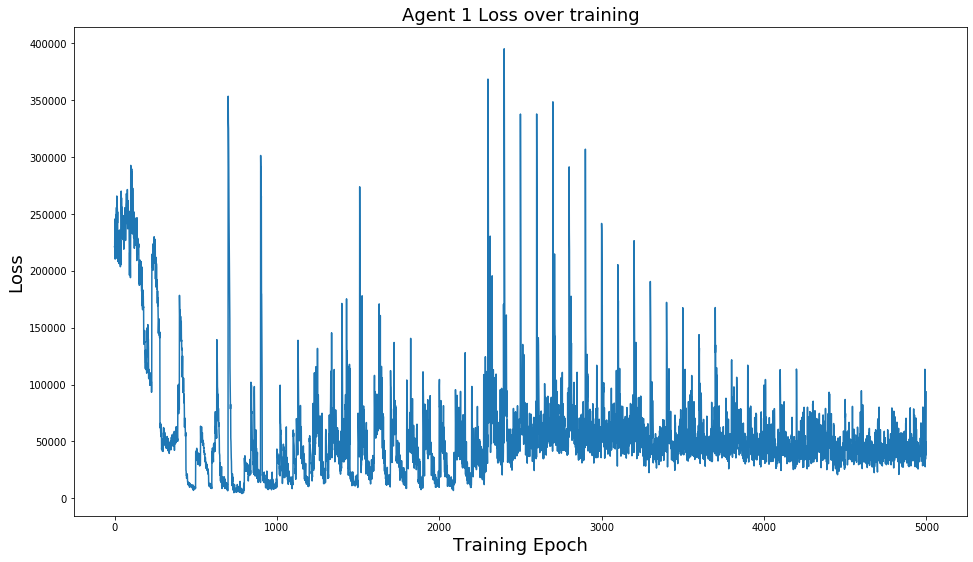

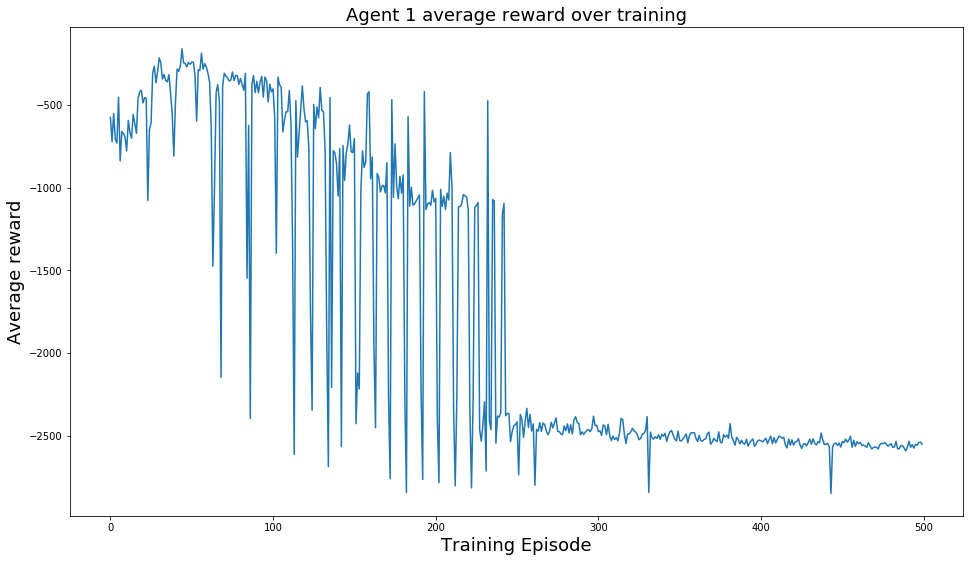

In [7]:
## AGENT TRAINING RESULTS
# Path to results folder
results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)

# Loop over each agent
for idx , agent in Balance_int_MultiDQN_Agents.Agents.items():
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[0].signal_id + 1
    print("Intersection "+str(intersection_number_in_vissim))
    
    ## SAVE TRAINING DATA TO JSON.
    json_filename = "Agent{}_Loss_average_reward.json".format(intersection_number_in_vissim)
    Loss_reward = dict()   
    # Loss dictionary
    for epoch, loss in enumerate(agent.loss):
        loss_dict = { epoch : loss }
    Loss_reward['Agent{} loss'.format(intersection_number_in_vissim)] = loss_dict
    # Reward dictionary            
    episode = [i for i in range(len(agent.reward_storage))]
    Loss_reward['Agent{} Average_Reward'.format(intersection_number_in_vissim)] = agent.reward_storage
    # Store as JSON
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Loss_reward, f)
    print("Agent {}: Training Loss and Average Reward during training successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
    
    ## LOADING DATA FROM JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Agent{}_Loss_average_reward.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
    
    ## TRAINING PLOTS
    loss_plot_filename  = "Agent{}_Loss.png".format(intersection_number_in_vissim)
    reward_plot_filename  = "Agent{}_average_reward.png".format(intersection_number_in_vissim) 
    
    ## Loss Plot
    plt.figure('LossAgent'+str(idx),figsize=(16,9))
    plt.plot(agent.loss)
    plt.xlabel('Training Epoch',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent {} Loss over training'.format(intersection_number_in_vissim),fontsize=18)
    plt.savefig(results_path + "/" + loss_plot_filename)

    ## Average Reward Plot
    plt.figure('RewardAgent'+str(idx),figsize=(16,9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Training Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent {} average reward over training'.format(intersection_number_in_vissim),fontsize=18)
    plt.savefig(results_path + "/" + reward_plot_filename)
    

In [ ]:
Balance_int_MultiDQN_Agents.load(500, best = True)

In [ ]:
Balance_int_MultiDQN_Agents.demo()

In [8]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay  = Balance_int_MultiDQN_Agents.test()

Working Directory set to: C:\Users\acabrejasegea\OneDrive - The Alan Turing Institute\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Balance_int1_2_4.inpx ...
Model File load process successful.
Simulation length set to 9001 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 542
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: test
Starting Deploymen

Agent 1: Queues during Test successfuly saved to file:
C:\Users\acabrejasegea\OneDrive - The Alan Turing Institute\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\Balance_int1_2_4\Agents_Results\DDQN\Balance_int1_2_4_default_actions_500_9000_DDQN/Junction1_Queues.json
Agent 1: Test Cumulative Delay successfuly saved to file:
C:\Users\acabrejasegea\OneDrive - The Alan Turing Institute\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\Balance_int1_2_4\Agents_Results\DDQN\Balance_int1_2_4_default_actions_500_9000_DDQN/Junction1_Cumulative_Delay.json
Agent 1: Test Cumulative Stop Delay successfuly saved to file:
C:\Users\acabrejasegea\OneDrive - The Alan Turing Institute\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\Balance_int1_2_4\Agents_Results\DDQN\Balance_int1_2_4_default_actions_500_9000_DDQN/Junction1_Cumulative_Stop_Delay.json


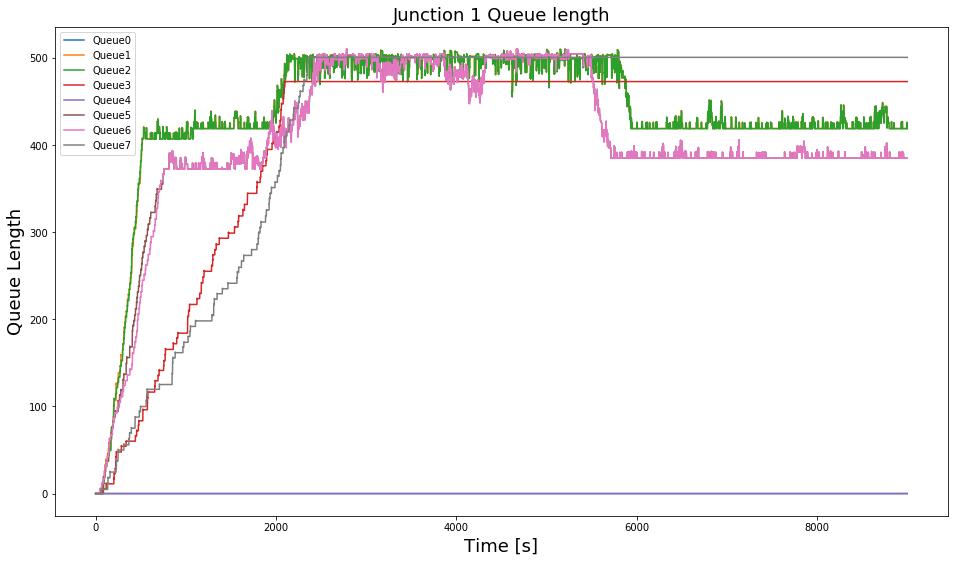

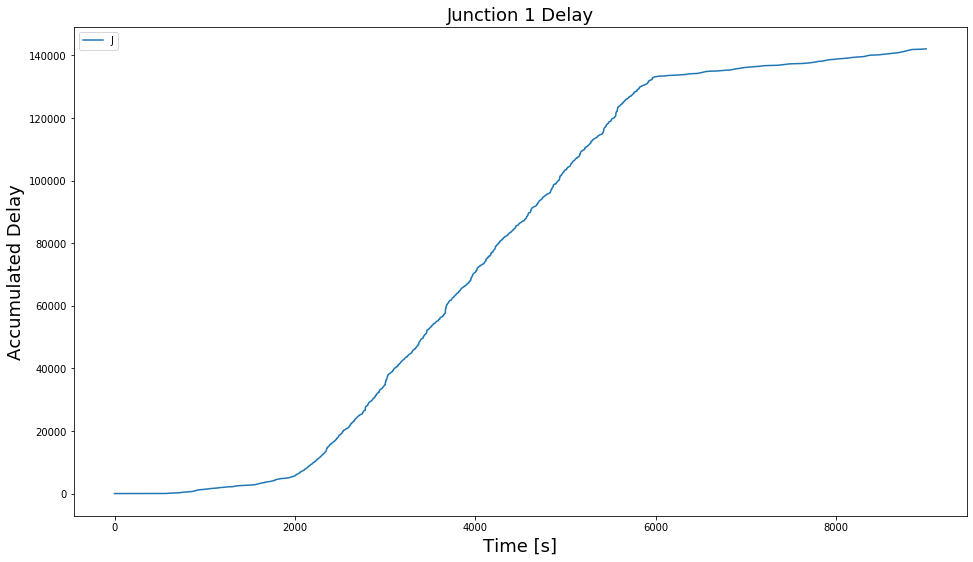

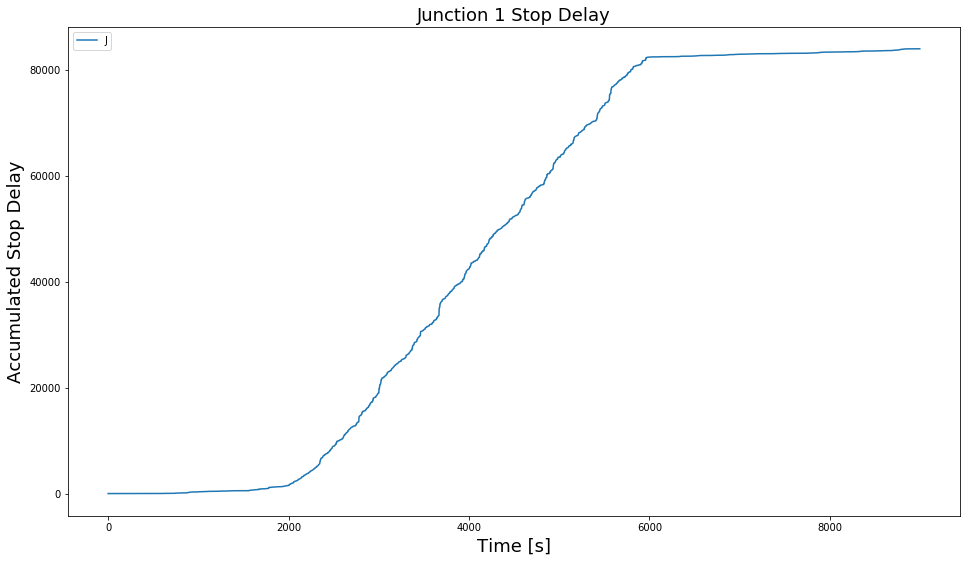

In [9]:
results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

########################################
## Queues over time for each junction ##
########################################
for idx, queues in Episode_Queues.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[0].signal_id + 1
    
    queues = np.array(queues)
    queues = queues.T
    number_queues = np.size(queues,0)
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queues = dict()
    Queues['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue, label = "Queue"+str(i))
        Queues[str(i)] = queue.tolist()
        Queues_legend.append("Queue"+str(i))
    
    ## Plot the queues
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend(Queues_legend)
    
    filename = "Junction{}_Queues.png".format(intersection_number_in_vissim)           
    plt.savefig(results_path + "/" + filename)
    
    # Store as JSON
    json_filename = "Junction{}_Queues.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Queues, f)
        
    ### LOADING DATA FROM JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #json_filename = "Junction{}_Queues.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
        
    # Success Message
    print("Agent {}: Queues during Test successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
       
        
###################################################        
## Accumulated delay over time for each junction ##
###################################################
for idx, delay in Cumulative_Episode_Delays.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[idx].signal_id + 1

    # Extract and process delay data
    Delay = dict()   
    Delay['Time'] = time
    Delay['Junction {} delay'.format(intersection_number_in_vissim)] = delay
    
    # Store as JSON
    json_filename = "Junction{}_Cumulative_Delay.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Delay, f)
        
    # Success Message
    print("Agent {}: Test Cumulative Delay successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
    
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Junction{}_Cumulative_Delay.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    # Plot the cumulative delay
    plt.figure('2'+str(idx),figsize=(16, 9))
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    filename = "Junction{}_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)
    
    
    
########################################################    
## Accumulated stop delay over time for each junction ##
########################################################
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[idx].signal_id + 1    
    
    # Extract and process stop delay data
    Stop_delay = dict()   
    Stop_delay['Time'] = time
    Stop_delay['Junction {} stop delay'.format(intersection_number_in_vissim)] = stop_delay
    
    # Store as JSON
    json_filename = "Junction{}_Cumulative_Stop_Delay.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Stop_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Stop Delay successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Junction{}_Cumulative_Stop_Delay.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
    
    # Plot the cumulative stop delay
    plt.figure('3'+str(idx),figsize=(16, 9))
    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    filename = "Junction{}_Cumulative_Stop_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)

    
    
###############################################
## ONLY IF THERE IS MORE THAN ONE CONTROLLER ##
##    These are the global network plots     ##
###############################################

if len(Balance_int_MultiDQN_Agents.Agents) > 1:
    ########################################    
    ## Global Accumulated delay over time ##
    ########################################
    
    # Process global delay data
    Global_delay = dict()   
    Global_delay['Time'] = time
    Global_delay['Global accumulated Delay'] = Cumulative_Totale_network_delay
    
    # Store as JSON
    json_filename = "Global_Cumulative_Delay.json"
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Global_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Global Delay successfuly saved to file:")
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Global_Cumulative_Delay.json"
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    
    # Plot the global delay
    plt.figure('4',figsize=(16,9))
    plt.plot(Cumulative_Totale_network_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Global accumulated Delay',fontsize=18)
    plt.title('Global accumulated Delay',fontsize=18)
    plt.gca().legend('Global accumulated delay')

    filename = "Global_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)


    #############################################
    ## Global Accumulated stop delay over time ##
    #############################################
    
    # Process global stop delay data
    Global_stop_delay = dict()   
    Global_stop_delay['Time'] = time
    Global_stop_delay['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay
    
    # Store as JSON
    json_filename = "Global_Cumulative_Stop_Delay.json"
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Global_stop_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Global Stop Delay successfuly saved to file:")
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Global_Cumulative_Stop_Delay.json"
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    # Plot the global stop delay
    plt.figure('5'+str(idx),figsize=(16, 9))
    plt.plot(Cumulative_Totale_network_stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Global accumulated stop Delay',fontsize=18)
    plt.title('Global accumulated stop Delay',fontsize=18)
    plt.gca().legend('Global accumulated stop Delay')
    
    filename = "Global_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)



# Balance RL DQN

In [ ]:
map_name  = 'Balance'
model_name = map_name

vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'
#vissim_working_directory = "E:\\OneDrive - University of Warwick\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim"

## Simulation Parameters
Random_Seed = 44
sim_length = 3601
timesteps_per_second = 1
agent_type = "DQN"
actions = 'default_actions'     # 'default_actions' or 'all_actions'

## DQN Hyperaramenters
episodes = 500
copy_weights_frequency = 10

PER_activated = True
memory_size = 5000
batch_size = 128
batches_per_episode = 10

alpha = 0.00005
gamma = 0.95

# Load and partition balance dictionary
Balance_dictionary = balance_dictionary(agent_type)

Session_ID = map_name + "_" + actions + "_" + str(episodes) + "_" + str(sim_length-1) + "_" + agent_type
print("Current simulation: {}".format(Session_ID))

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)


In [ ]:
Balance_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary, actions,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, batches_per_episode, copy_weights_frequency, epsilon_sequence,\
                Random_Seed, timesteps_per_second, Session_ID, verbose = True)

In [ ]:
Balance_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Balance_MultiDQN_Agents.train(episodes)

In [ ]:
Balance_MultiDQN_Agents.save(500)

In [ ]:
Balance_MultiDQN_Agents.demo()

In [ ]:
# For the agent training
ploty = 1
for idx , agent in Balance_MultiDQN_Agents.Agents.items():
    print("Agent "+str(idx))
    #print(ploty)
    #plt.subplot(14, 2, ploty)

    plt.figure('6'+str(idx),figsize=(4.5, 3))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "DQN", \
                        "Agent{}_Loss.png".format(idx)) 
    #plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "DQN", \
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    ploty+=1
    #print(ploty)

    
    #plt.subplot(14, 2, ploty)
    plt.figure('7'+str(idx),figsize=(4.5, 3))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "DQN", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    #plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    #Loss_rewarddf.to_csv(csv_Path,index=False)
    ploty+=1
    

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay  = Balance_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(queues)
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue, label = "Queue"+str(i))
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    #plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
    plt.legend()
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)

In [ ]:
Balance_MultiDQN_Agents.load(498, best = True)

In [ ]:
Balance_MultiDQN_Agents.demo()

# Single_Cross_Straight AC

---> The lack of speed comes from the size of the model (particularly the change of color of the heads). 

In [ ]:
model_name  = 'Single_Cross_Straight'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

agent_type = "AC"
Session_ID = "Single_Cross_Straigth_AC"



# all controller actions
Single_Cross_Straight_dictionary =\
{'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
         
         'all_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '3-1', '5-1', '7-1'],
         'agent_type' : agent_type,
         'controled_by_com' : True,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [5],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' }
        },
 'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [200,200,200,200],
             1 : [400,400,400,400],
             2 : [900,500,900,500],
             3 : [1000,500,1000,500],
             4 : [700,500,700,500],
             5 : [500,700,500,700],
             6 : [500,1000,500,1000],
             7 : [500,900,500,900],
             8 : [400,400,400,400],
             9 : [200,200,200,200]
            }
 
}

In [ ]:
gamma = 0.95
alpha = 0.00001


value = 0.5
entropy = 0.5
n_step_size = 16
state_size = [5]
reduce_entropy_every = 100
Random_Seed = 100



# for the monitoring
horizon = 50
n_sample = 10


In [ ]:
Single_Cross_Straight_MultiAC_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Straight_dictionary,\
                n_step_size, gamma, alpha, entropy, value, \
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True, \
                 horizon = horizon, n_sample = n_sample)

In [ ]:
Single_Cross_Straight_MultiAC_Agents.train(200) 

In [ ]:
Single_Cross_Straight_MultiAC_Agents.save(401)


In [ ]:
Single_Cross_Straight_MultiAC_Agents.load(200, best = True)
            
            
            
        
            

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay = Single_Cross_Straight_MultiAC_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(Episode_Queues[0])
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue)
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)


# For the agent training

for idx , agent in  Single_Cross_Straight_MultiAC_Agents.Agents.items():  
    plt.figure('6'+str(idx),figsize=(16, 9))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_Loss.png".format(idx)) 
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    
    
    plt.figure('7'+str(idx),figsize=(16, 9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    Loss_rewarddf.to_csv(csv_Path,index=False)

In [ ]:
Single_Cross_Straight_MultiAC_Agents.Agents[0].Loss

In [ ]:
Single_Cross_Straight_MultiAC_Agents.demo()

# Single_Cross_Straight DQN

In [ ]:
model_name  = 'Single_Cross_Straight'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

agent_type = "DuelingDQN"
Session_ID = "Single_Cross_Straigth_DuelingDQN20c0"

# all controller actions
# all controller actions
Single_Cross_Straight_dictionary =\
{'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
         
         'all_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '3-1', '5-1', '7-1'],
         'agent_type' : agent_type,
         'controled_by_com' : True,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [5],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues',
         'queues_counter_ID' : [1,2,3,4]  }
        },
 'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [200,200,200,200],
             1 : [400,400,400,400],
             2 : [900,500,900,500],
             3 : [1000,500,1000,500],
             4 : [700,500,700,500],
             5 : [500,700,500,700],
             6 : [500,1000,500,1000],
             7 : [500,900,500,900],
             8 : [400,400,400,400],
             9 : [200,200,200,200]
            }
 
}

## DQN Hyperaramenters
episodes = 300
copy_weights_frequency = 10

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Straight_dictionary,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.train(episodes)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.save(401)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.load(300 , best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay  = Single_Cross_Straight_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(Episode_Queues[0])
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue)
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)


# For the agent training

for idx , agent in  Single_Cross_Straight_MultiDQN_Agents.Agents.items():  
    plt.figure('6'+str(idx),figsize=(16, 9))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_Loss.png".format(idx)) 
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    
    
    plt.figure('7'+str(idx),figsize=(16, 9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    Loss_rewarddf.to_csv(csv_Path,index=False)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.demo()

# Single_Cross_Triple 4 actions AC

In [ ]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3600

agent_type = "AC"
Session_ID = "Single_Cross_TripleAC4test1"

# all controller actions
Single_Cross_Triple_dictionary4 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             },
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' 
         }
    },
   'demand' : {"default" : [400,400,400,400] }
}

In [ ]:
gamma = 0.85
alpha = 0.00005


value = 0.5
entropy = 5000
n_step_size = 4
state_size = [13]
reduce_entropy_every = 100
Random_Seed = 100



# for the monitoring
horizon = 50
n_sample = 10


In [ ]:
Single_Cross_Triple4_MultiAC_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary4,\
                n_step_size, gamma, alpha, entropy, value, \
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True, \
                 horizon = horizon, n_sample = n_sample)

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.train(400) 

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.save(401)

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.load(50, best = False)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays, Cumulative_Totale_network_delay = Single_Cross_Triple4_MultiAC_Agents.test()

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.demo()

# Single_Cross_Triple 4 action DQN

In [ ]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

Session_ID = "Single_Cross_Triple4_actions"
#Session_ID = "DQN"

agent_type = "DuelingDDQN"

# all controller actions
Single_Cross_Triple_dictionary4 =\
{ 'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' :    {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                     1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                     2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                     3 : [0,0,0,0,0,0,0,0,0,1,1,1]},
         
         
         'all_actions' :       {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                     1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                     2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                     3 : [0,0,0,0,0,0,0,0,0,1,1,1]},
         
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 1,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' 
         },
        },
     'demand' : { 'default' : [400, 400, 400, 400]}
                  
}

In [ ]:
## DQN Hyperaramenters
episodes = 400
copy_weights_frequency = 5

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary4,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.train(120)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.save()

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.load(best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays, Cumulative_Totale_network_delay = Single_Cross_Triple4_MultiDQN_Agents.test()

In [ ]:
# To be arranged for multy agents

queues = np.array(Episode_Queues[0])
queues = queues.T

delay = Cumulative_Episode_Delays[0]

# Plot the queues
plt.figure(1)
for queue in queues:
    plt.plot(queue)

# plot the junctions delays
plt.figure(2)
plt.plot(delay)

#plot the total delays 
plt.figure(3)
plt.plot(Cumulative_Totale_network_delay)

# Dont freak out the 2 delays are not the same because the node is not covering all the junction

"""
Because the cars never leave the nodes the delay is not computed correctly (when the agent doesn't work) 
"""



In [ ]:
plt.figure(4)
plt.plot(Single_Cross_Triple4_MultiDQN_Agents.Agents[0].loss)

plt.figure(5)
plt.plot(Single_Cross_Triple4_MultiDQN_Agents.Agents[0].reward_storage)
print(Single_Cross_Triple4_MultiDQN_Agents.Agents[0].reward_storage)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.demo()

# Single_Cross_Triple 8 actions AC

In [ ]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

agent_type = "AC"
Session_ID = "Single_Cross_Triple8_actions_AC10"

# all controller actions
Single_Cross_Triple_dictionary8 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]             
         }
    },
   'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [300,300,300,300],
             1 : [600,600,600,600],
             2 : [1350,750,1350,750],
             3 : [1500,750,1500,750],
             4 : [1050,750,1050,750],
             5 : [750,1050,750,1050],
             6 : [750,1500,750,1500],
             7 : [750,1350,750,1350],
             8 : [600,600,600,600],
             9 : [300,300,300,300]
            }
}

In [ ]:
gamma = 0.95
alpha = 0.000001


value = 5
entropy = 500
n_step_size = 4
state_size = [13]
reduce_entropy_every = 100
Random_Seed = 100



# for the monitoring
horizon = 50
n_sample = 10


In [ ]:
Single_Cross_Triple8_MultiAC_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary8,\
                n_step_size, gamma, alpha, entropy, value, \
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True, \
                 horizon = horizon, n_sample = n_sample)

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.train(400) 

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.save(401)

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.load(50, best = False)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays, Cumulative_Totale_network_delay = Single_Cross_Triple8_MultiAC_Agents.test()

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.demo()

# Single_Cross_Triple 8 actions DQN

In [ ]:
model_name  = 'Single_Cross_Triple'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'

sim_length = 3601

agent_type = "DuelingDDQN"
Session_ID = "Single_Cross_Triple8_actions_DuelingDDQN20c10"

# all controller actions
Single_Cross_Triple_dictionary8 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]             
         }
    },
   'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [300,300,300,300],
             1 : [600,600,600,600],
             2 : [1350,750,1350,750],
             3 : [1500,750,1500,750],
             4 : [1050,750,1050,750],
             5 : [750,1050,750,1050],
             6 : [750,1500,750,1500],
             7 : [750,1350,750,1350],
             8 : [600,600,600,600],
             9 : [300,300,300,300]
            }
}

In [ ]:
## DQN Hyperaramenters
episodes = 400 
copy_weights_frequency = 20 # On a successfull run I copied the weight every 50

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary8,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.train(episodes) 

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.save(401)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.load(400,best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay  = Single_Cross_Triple8_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(queues)
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue, label = "Queue"+str(i))
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    #plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
    plt.legend()
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)


# For the agent training

for idx , agent in Single_Cross_Triple8_MultiDQN_Agents.Agents.items():  
    plt.figure('6'+str(idx),figsize=(16, 9))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_Loss.png".format(idx)) 
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    
    
    plt.figure('7'+str(idx),figsize=(16, 9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    Loss_rewarddf.to_csv(csv_Path,index=False)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.demo()

# Five intersection DQN

In [ ]:
model_name  = 'Five_intersection'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'

sim_length = 3601

agent_type = "DuelingDDQN"
Session_ID = "Five5transfert"

# all controller actions
Five_intersection_dictionary =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['11-1', '11-2', '11-3', '12-1', '12-2', '12-3', '13-1', '13-2', '13-3', '14-1', '14-2', '14-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues',
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]
         },
                  1 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['21-1', '21-2', '21-3', '22-1', '22-2', '22-3', '23-1', '23-2', '23-3', '24-1', '24-2', '24-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
        'queues_counter_ID' : [13,14,15,16,17,18,19,20,21,22,23,24]
         },
                  2 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['31-1', '31-2', '31-3', '32-1', '32-2', '32-3', '33-1', '33-2', '33-3', '34-1', '34-2', '34-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [25,26,27,28,29,30,31,32,33,34,35,36]
         },
                  3 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['41-1', '41-2', '41-3', '42-1', '42-2', '42-3', '43-1', '43-2', '43-3', '44-1', '44-2', '44-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
          'queues_counter_ID' : [37,38,39,40,41,42,43,44,45,46,47,48]
         },
                  4 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['51-1', '51-2', '51-3', '52-1', '52-2', '52-3', '53-1', '53-2', '53-3', '54-1', '54-2', '54-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [49,50,51,52,53,54,55,56,57,58,59,60]
         }
    },
   'demand' : { 'default' : [400,400,400,400,400,400,400,400,400,400,400,400],
             
             0 : [200,200,200,200,200,200,200,200,200,200,200,200],
             1 : [400,400,400,400,400,400,400,400,400,400,400,400],
             2 : [500,900,500,500,900,500,500,900,500,500,900,500],
             3 : [500,1000,500,500,1000,500,500,1000,500,500,1000,500],
             4 : [500,700,500,500,700,500,500,700,500,500,700,500],
             5 : [500,700,500,500,700,500,500,700,500,500,700,500],
             6 : [500,1000,500,500,1000,500,500,1000,500,500,1000,500],
             7 : [500,900,500,500,900,500,500,900,500,500,900,500],
             8 : [400,400,400,400,400,400,400,400,400,400,400,400],
             9 : [200,200,200,200,200,200,200,200,200,200,200,200]
            }
}

In [ ]:
## DQN Hyperaramenters
episodes = 400
copy_weights_frequency = 20 # On a successfull run I copied the weight every 50

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Five_intersection_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Five_intersection_dictionary,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Five_intersection_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Five_intersection_MultiDQN_Agents.train(episodes)

In [ ]:
Five_intersection_MultiDQN_Agents.save(401)
Five_intersection_MultiDQN_Agents.load(400,best = True)

In [ ]:
Five_intersection_MultiDQN_Agents.Agents[0].load_agent(vissim_working_directory, 'Single_Cross_Triple', 'Single_Cross_Triple8_actions',400 , best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay = Five_intersection_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]


# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(queues)
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    
    for i, queue in enumerate(queues):
        plt.plot(queue)
        Queuesdf[str(i)] = queue
        
    plt.xlabel('Time [s]')
    plt.ylabel('Queue Length')
    plt.title('Junction {} Queue length'.format(idx))
    plt.gca().legend(('West Queue','South Queue', 'East Queue', 'North Queue'))
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]')
    plt.ylabel('Accumulated Delay')
    plt.title('Junction {} Delay'.format(idx))
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]')
    plt.ylabel('Accumulated Stop Delay')
    plt.title('Junction {} Stop Delay'.format(idx))
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]')
plt.ylabel('Global accumulated Delay')
plt.title('Global accumulated Delay')
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]')
plt.ylabel('Global accumulated stop Delay')
plt.title('Global accumulated stop Delay')
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)

In [ ]:
Five_intersection_MultiDQN_Agents.Agents[2] = Five_intersection_MultiDQN_Agents.Agents[3]

In [ ]:
Five_intersection_MultiDQN_Agents.demo()